## Data Pre-Processing

In [804]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
import plotly.express as px
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from matplotlib.pyplot import figure
import numpy as np
import folium
import squarify
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import plotly.graph_objects as go
from folium.plugins import MarkerCluster

In [805]:
df_toronto_fire_orig = pd.read_csv('Fire-Incidents.csv')
df_toronto_fire_orig.head()
df = df_toronto_fire_orig.copy()
df.head()

Area_of_Origin  \
0                                   Porch or Balcony   
1                            Cooking Area or Kitchen   
2     Living Area (e.g. living, TV, recreation, etc)   
3                        Undetermined  (formerly 98)   
4  Sleeping Area or Bedroom (inc. patients room, ...   

                   Business_Impact  Civilian_Casualties  \
0         No business interruption                    0   
1                     Undetermined                    0   
2  Not applicable (not a business)                    1   
3        May not resume operations                    0   
4  Not applicable (not a business)                    8   

   Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
0                        86                   3000   
1                        28                  50000   
2                        16                1000000   
3                        12                1000000   
4                        11                 125000   

   Estimated_Number_Of_Persons_Displaced Ext_agent_app_or_defer_time  \
0                                      0         2018-08-24T17:06:26   
1                                     28         2018-11-24T07:19:00   
2                                    130         2017-02-09T18:02:13   
3                                     14         2012-10-30T00:52:04   
4                                      2         2018-07-08T04:35:00   

                             Extent_Of_Fire  \
0              Confined to object of origin   
1   Confined to part of room/area of origin   
2  Spread beyond room of origin, same floor   
3                          Entire Structure   
4  Spread beyond room of origin, same floor   

              Fire_Alarm_System_Impact_on_Evacuation  \
0  Not applicable: Occupant(s) first alerted by o...   
1  Not applicable: Occupant(s) first alerted by o...   
2  Some persons (at risk) evacuated as a result o...   
3                                       Undetermined   
4  Some persons (at risk) evacuated as a result o...   

                Fire_Alarm_System_Operation Fire_Alarm_System_Presence  \
0         Fire alarm system did not operate  Fire alarm system present   
1                Fire alarm system operated  Fire alarm system present   
2                Fire alarm system operated  Fire alarm system present   
3  Fire alarm system operation undetermined               Undetermined   
4                Fire alarm system operated  Fire alarm system present   

  Fire_Under_Control_Time                                    Ignition_Source  \
0     2018-08-24T17:06:28                                       Undetermined   
1     2018-11-24T07:19:00  Other Cooking Items (eg Toaster, Kettle, elec ...   
2     2017-02-09T18:36:21                                       Undetermined   
3     2012-10-30T01:28:48                                       Undetermined   
4     2018-07-08T04:38:28        Matches or Lighters (unable to distinguish)   

   Incident_Station_Area  Incident_Ward Last_TFS_Unit_Clear_Time   Latitude  \
0                    114           18.0      2018-08-24T17:42:43  43.760357   
1                    142            7.0      2018-11-24T12:45:21  43.754542   
2                    325           27.0      2017-02-09T23:36:33  43.657300   
3                    332           20.0      2012-11-01T16:30:31  43.649350   
4                    442            5.0      2018-07-08T16:44:07  43.697960   

   Longitude      Material_First_Ignited           Method_Of_Fire_Control  \
0 -79.412479  Undetermined (formerly 98)  Extinguished by fire department   
1 -79.530419                     Plastic         Extinguished by occupant   
2 -79.373460  Undetermined (formerly 98)  Extinguished by fire department   
3 -79.393700  Undetermined (formerly 98)  Extinguished by fire department   
4 -79.511539                     Bedding  Extinguished by fire department   

        Possible_Cause                         Property_Use  \
0         Undetermined  Multi-Unit Dwelli

In [806]:
#find and replace nan values
print(df.isna().any())
print(df["Incident_Ward"].unique())
print(df["Incident_Ward"].isna().sum())
df["Incident_Ward"].fillna(-1, inplace=True)
df["Incident_Ward"].unique()

Area_of_Origin                              False
Business_Impact                             False
Civilian_Casualties                         False
Count_of_Persons_Rescued                    False
Estimated_Dollar_Loss                       False
Estimated_Number_Of_Persons_Displaced       False
Ext_agent_app_or_defer_time                 False
Extent_Of_Fire                              False
Fire_Alarm_System_Impact_on_Evacuation      False
Fire_Alarm_System_Operation                 False
Fire_Alarm_System_Presence                  False
Fire_Under_Control_Time                     False
Ignition_Source                             False
Incident_Station_Area                       False
Incident_Ward                                True
Last_TFS_Unit_Clear_Time                    False
Latitude                                    False
Longitude                                   False
Material_First_Ignited                      False
Method_Of_Fire_Control                      False


array([18.,  7., 27., 20.,  5., 15., 14., 17., 29.,  9.,  8., 42., 22.,
       36., 43.,  1., 28., 33., 24., 35., 37., 30., 34., 11., 10.,  6.,
       21.,  4., 19., 26., 44., 32., 23., 25., 38., 31.,  2., 13., 12.,
       16.,  3., 40., 41., -1., 39.])

In [807]:
#find original dtypes of columns and convert them to the right types 
print(df.dtypes)
df = df.astype({"Area_of_Origin":"string",
                "Business_Impact":"string",
                "Extent_Of_Fire":"string" ,
                "Fire_Alarm_System_Impact_on_Evacuation":"string",     
                "Fire_Alarm_System_Operation":"string" ,
                "Fire_Alarm_System_Presence":"string",
                "Ignition_Source":"string",
                "Material_First_Ignited":"string", 
                "Method_Of_Fire_Control":"string",
                "Possible_Cause":"string",
                "Property_Use":"string",  
                "Smoke_Alarm_at_Fire_Origin_Alarm_Failure":"string", 
                "Smoke_Alarm_at_Fire_Origin_Alarm_Type":"string",
                "Status_of_Fire_On_Arrival":"string"})


df['Ext_agent_app_or_defer_time']= pd.to_datetime(df['Ext_agent_app_or_defer_time'])
df['Fire_Under_Control_Time']= pd.to_datetime(df['Fire_Under_Control_Time'])
df['Last_TFS_Unit_Clear_Time']= pd.to_datetime(df['Last_TFS_Unit_Clear_Time'])
df['TFS_Alarm_Time']= pd.to_datetime(df['TFS_Alarm_Time'])
df['TFS_Arrival_Time']= pd.to_datetime(df['TFS_Arrival_Time'])

print("\nnew df types:\n", df.dtypes)

df['TFS_Arrival_Time'].head()

Area_of_Origin                               object
Business_Impact                              object
Civilian_Casualties                           int64
Count_of_Persons_Rescued                      int64
Estimated_Dollar_Loss                         int64
Estimated_Number_Of_Persons_Displaced         int64
Ext_agent_app_or_defer_time                  object
Extent_Of_Fire                               object
Fire_Alarm_System_Impact_on_Evacuation       object
Fire_Alarm_System_Operation                  object
Fire_Alarm_System_Presence                   object
Fire_Under_Control_Time                      object
Ignition_Source                              object
Incident_Station_Area                         int64
Incident_Ward                               float64
Last_TFS_Unit_Clear_Time                     object
Latitude                                    float64
Longitude                                   float64
Material_First_Ignited                       object
Method_Of_Fi

0   2018-08-24 16:54:09
1   2018-11-24 07:14:23
2   2017-02-09 17:48:49
3   2012-10-30 00:44:58
4   2018-07-08 04:13:54
Name: TFS_Arrival_Time, dtype: datetime64[ns]

In [808]:
#Assessing all categorical columns: 

print("Area_of_Origin ", df["Area_of_Origin"].nunique())
print("Business_Impact ", df["Business_Impact"].nunique())
print("Extent_Of_Fire ", df["Extent_Of_Fire"].nunique())
print("Fire_Alarm_System_Impact_on_Evacuation ", df["Fire_Alarm_System_Impact_on_Evacuation"].nunique())
print("Fire_Alarm_System_Operation ", df["Fire_Alarm_System_Operation"].nunique())
print("Fire_Alarm_System_Presence ", df["Fire_Alarm_System_Presence"].nunique())
print("Ignition_Source ", df["Ignition_Source"].nunique())
print("Material_First_Ignited ", df["Material_First_Ignited"].nunique())
print("Method_Of_Fire_Control ", df["Method_Of_Fire_Control"].nunique())
print("Possible_Cause ", df["Possible_Cause"].nunique())
print("Property_Use ", df["Property_Use"].nunique())
print("Smoke_Alarm_at_Fire_Origin_Alarm_Failure ", df["Smoke_Alarm_at_Fire_Origin_Alarm_Failure"].nunique())
print("Smoke_Alarm_at_Fire_Origin_Alarm_Type ", df["Smoke_Alarm_at_Fire_Origin_Alarm_Type"].nunique())
print("Status_of_Fire_On_Arrival ", df["Status_of_Fire_On_Arrival"].nunique())

Area_of_Origin  73
Business_Impact  7
Extent_Of_Fire  12
Fire_Alarm_System_Impact_on_Evacuation  7
Fire_Alarm_System_Operation  4
Fire_Alarm_System_Presence  4
Ignition_Source  82
Material_First_Ignited  54
Method_Of_Fire_Control  5
Possible_Cause  24
Property_Use  217
Smoke_Alarm_at_Fire_Origin_Alarm_Failure  11
Smoke_Alarm_at_Fire_Origin_Alarm_Type  6
Status_of_Fire_On_Arrival  8


In [809]:
#categories for area of origin, ignition course, material first ignited and property use 
#need to be refine into a smaller list of categories 

df['Year'] = df['TFS_Alarm_Time'].dt.year
print("Area_of_Origin:\n", df["Area_of_Origin"].value_counts())
print("\nIgnition_Source:\n", df["Ignition_Source"].value_counts())
print("\nMaterial_First_Ignited:\n", df["Material_First_Ignited"].value_counts())
print("\nProperty_Use:\n", df["Property_Use"].value_counts())


Area_of_Origin:
 Cooking Area or Kitchen                              2870
Porch or Balcony                                      950
Sleeping Area or Bedroom (inc. patients room, ...     868
Trash, Rubbish Storage (inc garbage chute room...     751
Living Area (e.g. living, TV, recreation, etc)        594
Garage                                                392
Laundry Area                                          365
Washroom or Bathroom (toilet,restroom/locker r...     288
Roof                                                  259
Other - unclassified                                  201
Process Manufacturing (inc manf, prod assembly...     201
Chimney/Flue Pipe                                     197
Engine Area                                           176
Trash, rubbish area (outside)                         173
Mechanical/Electrical Services Room                   169
Basement/cellar (not partitioned)                     159
Exterior Wall                                         1

## EDA

In [810]:
#What are the areas of origin where fires most occur?
df_topfire = df.groupby(['Area_of_Origin']).size().reset_index(name='Total Occurances')
total_count = df_topfire['Total Occurances'].sum()
df_topfire['percentage'] = (df_topfire['Total Occurances'] / total_count) * 100
df_topfire = df_topfire.sort_values(by='Total Occurances', ascending=False)
area_of_origin = df_topfire['Area_of_Origin'].head(10)
df_topfire['Area_of_Origin'] =df_topfire['Area_of_Origin'].str.split(r"\(", n=1).str[0]
df_topfire.head(10)

Area_of_Origin  Total Occurances  percentage
11    Cooking Area or Kitchen              2870   25.593009
51           Porch or Balcony               950    8.471553
62  Sleeping Area or Bedroom                868    7.740325
66    Trash, Rubbish Storage                751    6.696986
31               Living Area                594    5.296950
25                     Garage               392    3.495630
30               Laundry Area               365    3.254860
72      Washroom or Bathroom                288    2.568218
57                       Roof               259    2.309613
40       Other - unclassified               201    1.792402

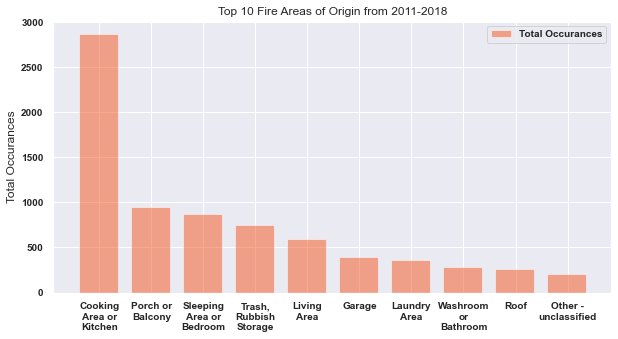

In [811]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

df_Q1 = df_topfire.head(10)
f, ax1 = plt.subplots(1, figsize=(10,5))
bar_width = 0.75
bar_l = [i+1 for i in range(len(df_Q1['Total Occurances']))] 
ax1.bar(bar_l, 
        df_Q1['Total Occurances'], 
        width=bar_width,
        label='Total Occurances', 
        alpha=0.5, 
        color='#F4561D')

tick_pos = [i+(bar_width/32) for i in bar_l]
plt.xticks(tick_pos, df_Q1['Area_of_Origin'])
ax1.set_ylabel('Total Occurances')
ax1.legend(loc='upper right', fontsize=10)
plt.title('Top 10 Fire Areas of Origin from 2011-2018')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
wrap_labels(ax1, 10)

In [812]:
#What are the top determinants (probable cause) of residential fire in Toronto over the last 9 years?
df_topfire2 = df[['Area_of_Origin','Possible_Cause']]
df_topfire2 = df_topfire2.groupby(['Area_of_Origin', 'Possible_Cause']).size().reset_index(name='Total Occurances')
df_topfidf_topfire2re = pd.DataFrame(df_topfire2)
df_topfire2 = df_topfire2.sort_values(by=['Area_of_Origin', 'Total Occurances'], ascending=[True, False])
df_topfire2 = df_topfire2.groupby('Area_of_Origin').apply(lambda x: x.sort_values(by='Total Occurances', ascending=False)).reset_index(drop=True)

df_Q2 = pd.DataFrame()
for row in area_of_origin: 
    temp = df_topfire2[df_topfire2['Area_of_Origin']==row]
    df_Q2 = pd.concat([df_Q2, temp], ignore_index=True)

#df_Q2['Area_of_Origin'] = df_Q2['Area_of_Origin'].str.split(r"\(", n=1).str[0]

fig = px.treemap(df_Q2, 
                 path=['Area_of_Origin', 'Possible_Cause'], 
                 values='Total Occurances')

fig.update_traces(textinfo='label+value')
fig.update_layout(width=1000, height=800)
fig.show()

/Users/user/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/user/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [813]:
#data on fire with top 15 casualties 
df['Casualties_YN'] = 'No'
df.loc[df['Civilian_Casualties'] > 0, 'Casualties_YN'] = 'Yes'
df['Displaced_YN'] = 'No'
df.loc[df['Estimated_Number_Of_Persons_Displaced'] > 0, 'Displaced_YN'] = 'Yes'
label_encoder = LabelEncoder()
df['Area_of_Origin_Endcoded'] = label_encoder.fit_transform(df['Area_of_Origin'])
df_Q4 = df.sort_values(by='Civilian_Casualties', ascending=False)
df_Q4.head(15)

Area_of_Origin  \
13                                     Hallway, Corridor   
4      Sleeping Area or Bedroom (inc. patients room, ...   
7                                Cooking Area or Kitchen   
8914   Washroom or Bathroom (toilet,restroom/locker r...   
11212                                   Porch or Balcony   
20                               Cooking Area or Kitchen   
249       Living Area (e.g. living, TV, recreation, etc)   
15        Living Area (e.g. living, TV, recreation, etc)   
36                                    Other Outside Area   
16        Living Area (e.g. living, TV, recreation, etc)   
46                           Undetermined  (formerly 98)   
27        Living Area (e.g. living, TV, recreation, etc)   
317                    Basement/cellar (not partitioned)   
32                               Cooking Area or Kitchen   
7227                             Cooking Area or Kitchen   

                           Business_Impact  Civilian_Casualties  \
13                No business interruption                   15   
4          Not applicable (not a business)                    8   
7                 No business interruption                    8   
8914   May resume operations within a week                    7   
11212      Not applicable (not a business)                    6   
20         Not applicable (not a business)                    6   
249        Not applicable (not a business)                    6   
15         Not applicable (not a business)                    6   
36         Not applicable (not a business)                    5   
16                            Undetermined                    5   
46                            Undetermined                    4   
27                            Undetermined                    4   
317        Not applicable (not a business)                    4   
32                No business interruption                    4   
7227              No business interruption                    4   

       Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
13                            6                1000000   
4                            11                 125000   
7                            11                  50000   
8914                          0                   5000   
11212                         0                 100000   
20                            5                  50000   
249                           1                  40000   
15                            6                 100000   
36                            3                 300000   
16                            6                  50000   
46                            3                 450000   
27                            4                 100000   
317                           1                 500000   
32                            4                   3000   
7227                          0                  80000   

       Estimated_Number_Of_Persons_Displaced Ext_agent_app_or_defer_time  \
13                                        50         2016-02-05 15:30:00   
4                                          2         2018-07-08 04:35:00   
7                                         40         2014-06-09 16:15:00   
8914                                       9         2015-07-17 08:15:00   
11212                                      1         2018-02-24 00:44:00   
20                                         6         2015-03-28 05:57:58   
249                                        6         2015-03-31 10:10:21   
15                                        30         2015-04-01 16:03:40   
36                                         7         2012-11-06 01:13:56   
16                                         1         2013-04-20 11:53:00   
46                                         9         2016-01-26 11:40:00   
27                                         2         2014-03-07 03:16:20   
317                                        8         2014-05-24 07:11:25   
32             

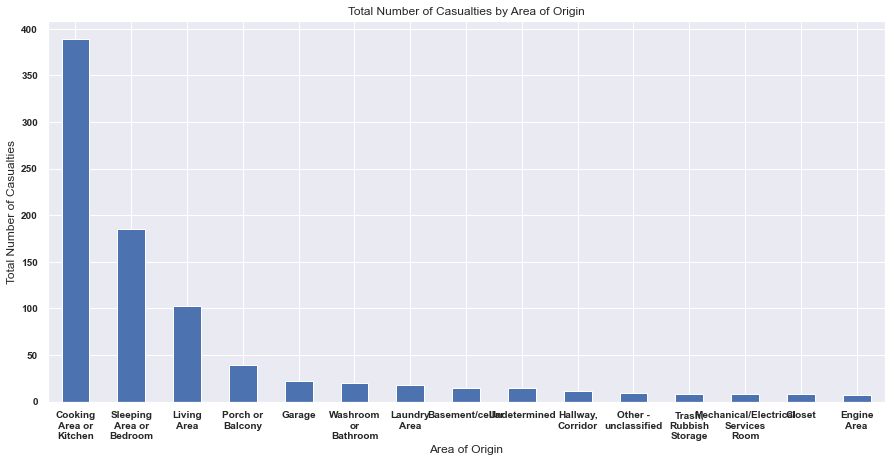

In [814]:
df_temp=df[df['Civilian_Casualties']>0].copy()
df_temp['Area_of_Origin'] =df_temp['Area_of_Origin'].str.split(r"\(", n=1).str[0]
result = df_temp.groupby('Area_of_Origin')['Civilian_Casualties'].count()
result = result.sort_values(ascending=False)
result = result.head(15)
plt.subplots(1, figsize=(15,7))
ax = result.plot(kind='bar')
plt.title('Total Number of Casualties by Area of Origin')
plt.xlabel('Area of Origin')
plt.ylabel('Total Number of Casualties')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
wrap_labels(ax, 10)

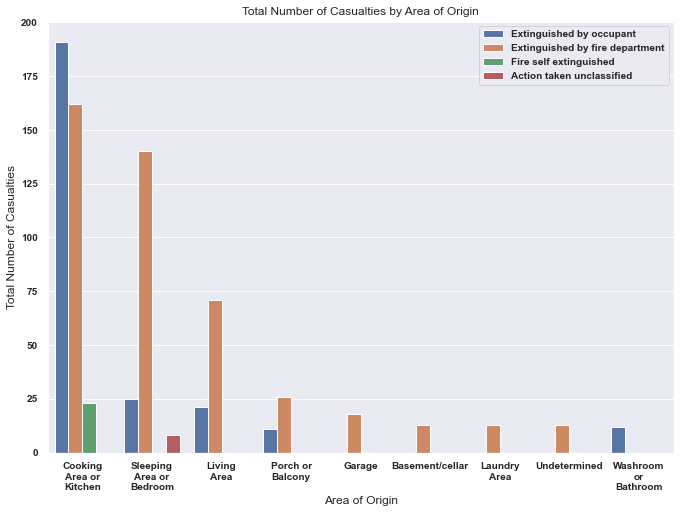

In [815]:
#more refined graph to show how the fire was extinguised for each type of fire vs total # of casualties 
df_temp=df[df['Civilian_Casualties']>0].copy()
df_temp['Area_of_Origin'] =df_temp['Area_of_Origin'].str.split(r"\(", n=1).str[0]
result = df_temp.groupby(['Area_of_Origin', 'Method_Of_Fire_Control']).count()['Civilian_Casualties'].reset_index()
result = result.sort_values(by='Civilian_Casualties', ascending=False)
result = result.head(15)
plt.subplots(1, figsize=(10,7))
ax3 = sns.barplot(x='Area_of_Origin', y='Civilian_Casualties', hue='Method_Of_Fire_Control', data=result)
plt.title('Total Number of Casualties by Area of Origin')
plt.xlabel('Area of Origin')
plt.ylabel('Total Number of Casualties')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
wrap_labels(ax3, 10)
ax3.legend(loc='upper right', fontsize=10)
plt.show()

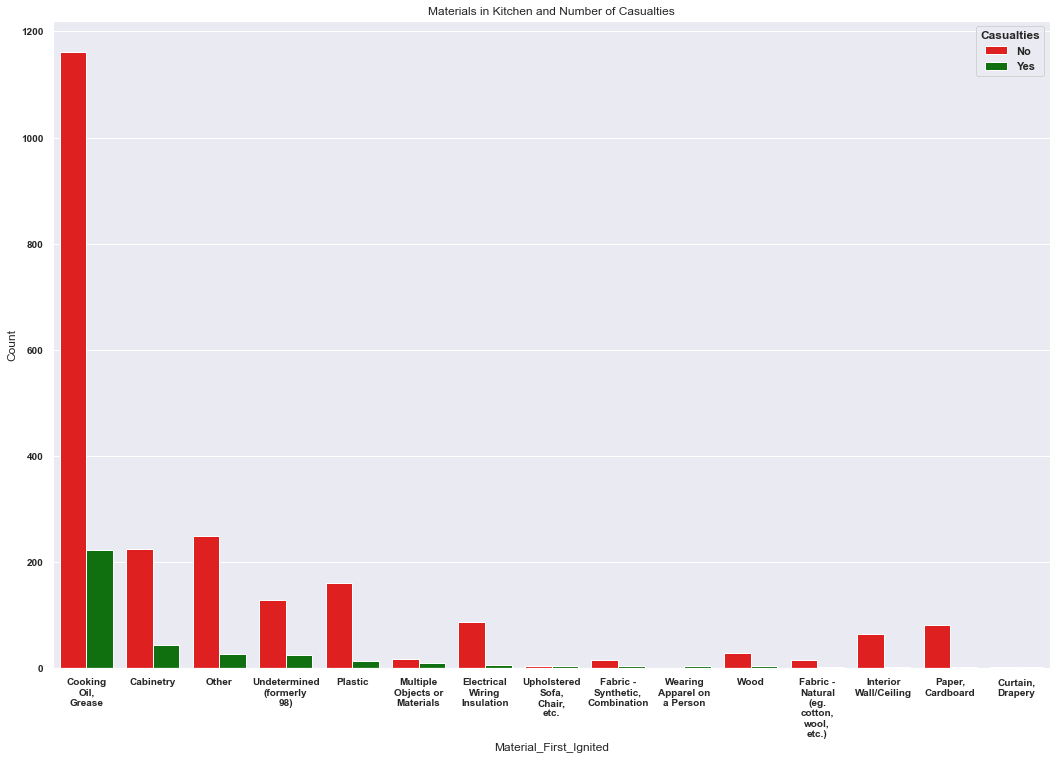

In [816]:
#which materials first ignited in the kitchen had more casualties 
df_temp = df.copy()
df_temp['Area_of_Origin']=df_temp['Area_of_Origin'].str.split(r"\(", n=1).str[0]
df_temp = df_temp[df_temp['Area_of_Origin'] == 'Cooking Area or Kitchen']
result = df_temp[['Material_First_Ignited', 'Casualties_YN']].copy()
result = result.groupby(['Material_First_Ignited', 'Casualties_YN']).size().reset_index()

result.rename(columns={0: 'Count'}, inplace=True)

result2 = result.sort_values(by=['Casualties_YN', 'Count'], ascending=False).head(15)
material = result2['Material_First_Ignited']
result3 = pd.DataFrame()
for row in material: 
    temp = result[result['Material_First_Ignited']==row]
    result3 = pd.concat([result3, temp], ignore_index=True)

colors = ['red', 'green']
plt.subplots(1, figsize=(15,10))
ax4 = sns.barplot(x='Material_First_Ignited', y='Count', hue='Casualties_YN', data=result3, palette=colors)
plt.title('Materials in Kitchen and Number of Casualties')
plt.xlabel('Material_First_Ignited')
plt.ylabel('Count')
plt.legend(title='Casualties')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
wrap_labels(ax4, 10)
plt.show()

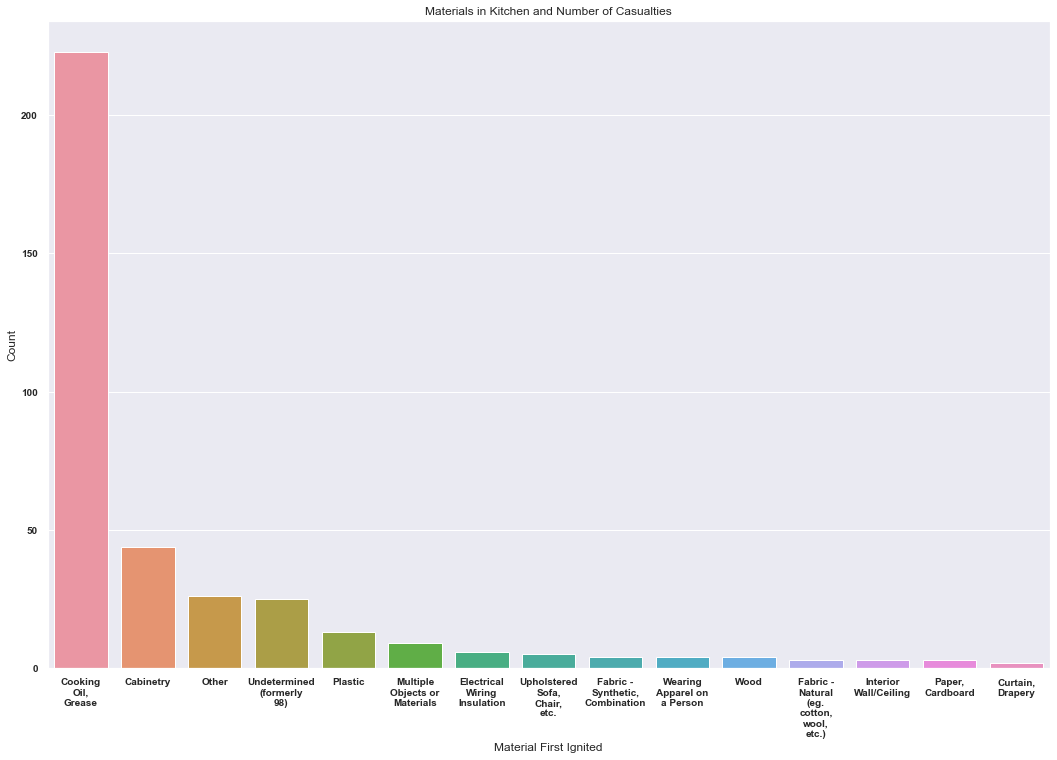

In [817]:
#which materials first ignited in the kitchen had more casualties
df_temp = df.copy()
df_temp['Area_of_Origin']=df_temp['Area_of_Origin'].str.split(r"\(", n=1).str[0]
df_temp = df_temp[df_temp['Area_of_Origin'] == 'Cooking Area or Kitchen']
result = df_temp[['Material_First_Ignited', 'Casualties_YN']].copy()
result = result.groupby(['Material_First_Ignited', 'Casualties_YN']).size().reset_index()

result.rename(columns={0: 'Count'}, inplace=True)

result2 = result.sort_values(by=['Casualties_YN', 'Count'], ascending=False).head(15)
material = result2['Material_First_Ignited']
result3 = pd.DataFrame()
for row in material: 
    temp = result[result['Material_First_Ignited']==row]
    result3 = pd.concat([result3, temp], ignore_index=True)

result3 = result3[result3['Casualties_YN'] == "Yes"]
plt.subplots(1, figsize=(15,10))
ax4 = sns.barplot(x='Material_First_Ignited', y='Count', data=result3)
plt.title('Materials in Kitchen and Number of Casualties')
plt.xlabel('Material First Ignited')
plt.ylabel('Count')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
wrap_labels(ax4, 10)
plt.show()

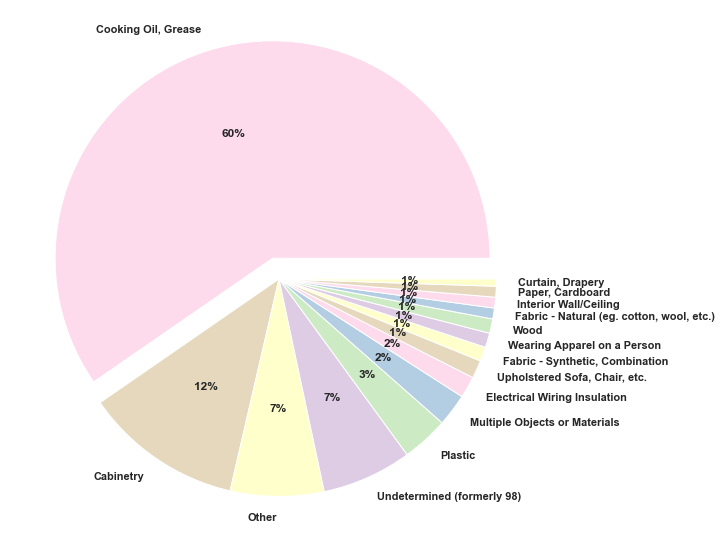

In [818]:
#percentage of type of materials first ignited in kitchen fires 
sns.set(font_scale = 1)
plt.figure(figsize=(10,10))
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0]
palette_color = seaborn.color_palette('Pastel1_r')
plt.pie(result3['Count'], labels=result3['Material_First_Ignited'], colors=palette_color,
        explode=explode, autopct='%.0f%%')

plt.show()

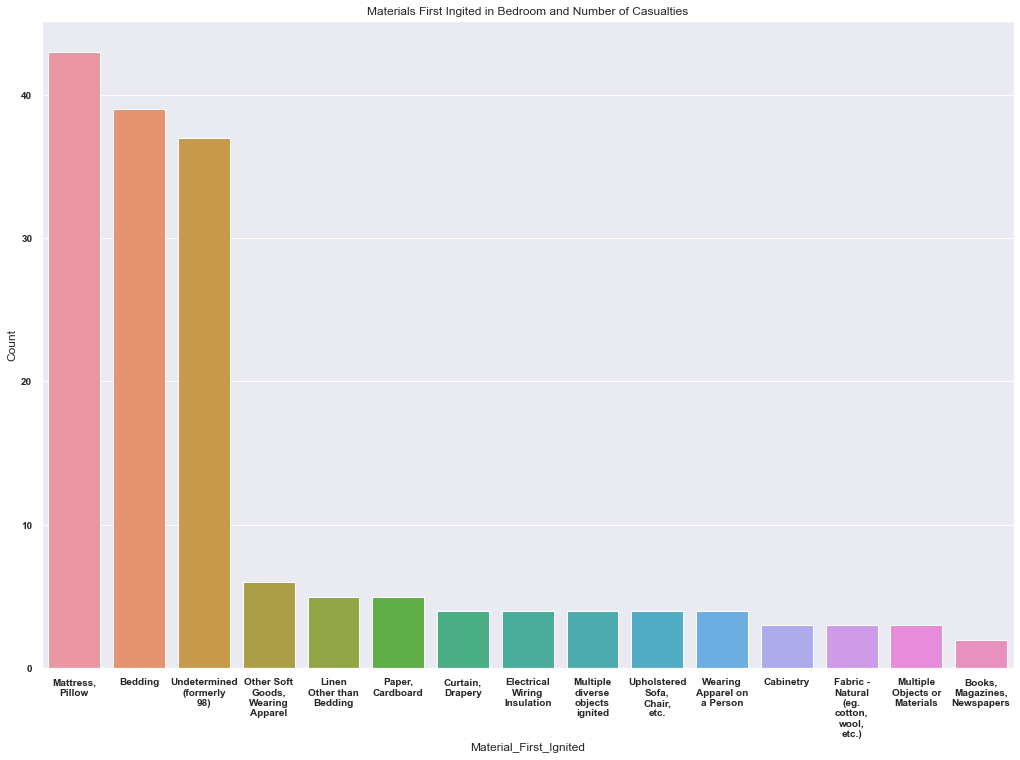

In [819]:
#number of casualties for materials first ignited 
df_temp = df.copy()
df_temp = df_temp[df['Area_of_Origin_Endcoded'] == 62]
result = df_temp[['Material_First_Ignited', 'Casualties_YN']].copy()
result = result.groupby(['Material_First_Ignited', 'Casualties_YN']).size().reset_index()

result.rename(columns={0: 'Count'}, inplace=True)

result2 = result.sort_values(by=['Casualties_YN', 'Count'], ascending=False).head(15)
material = result2['Material_First_Ignited']
result3 = pd.DataFrame()
for row in material: 
    temp = result[result['Material_First_Ignited']==row]
    result3 = pd.concat([result3, temp], ignore_index=True)
result3 = result3[result3['Casualties_YN'] == "Yes"]

plt.subplots(1, figsize=(15,10))
ax4 = sns.barplot(x='Material_First_Ignited', y='Count', data=result3)
plt.title('Materials First Ingited in Bedroom and Number of Casualties')
plt.xlabel('Material_First_Ignited')
plt.ylabel('Count')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
wrap_labels(ax4, 10)
plt.show()

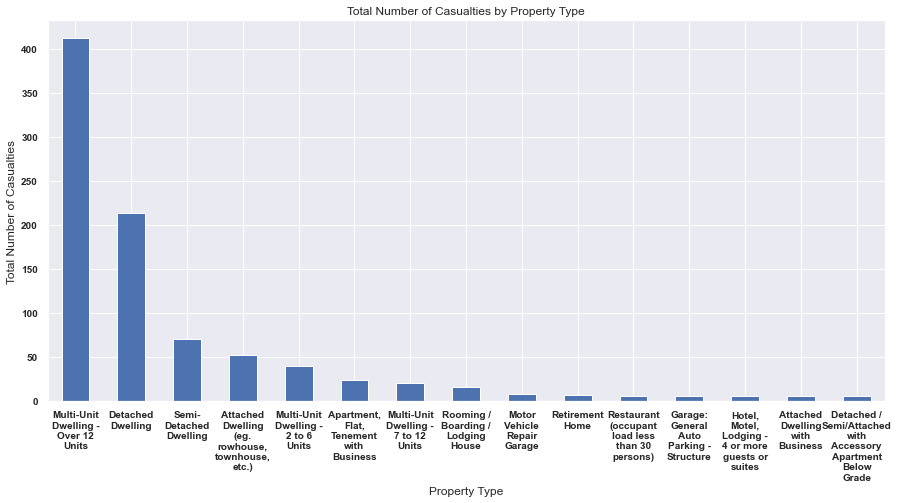

In [820]:
#most dangerous types of buildings
df_temp=df[df['Civilian_Casualties']>0].copy()
result = df_temp.groupby('Property_Use')['Civilian_Casualties'].count()
result = result.sort_values(ascending=False)
result = result.head(15)
result.rename(index={'Rooming/Boarding/Lodging House':'Rooming / Boarding / Lodging House'},inplace=True)
result.rename(index={'Detached/Semi/Attached with Accessory Apartment Below Grade':'Detached / Semi/Attached with Accessory Apartment Below Grade'},inplace=True)
plt.subplots(1, figsize=(15,7))
ax = result.plot(kind='bar')
plt.title('Total Number of Casualties by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Total Number of Casualties')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
wrap_labels(ax, 10)

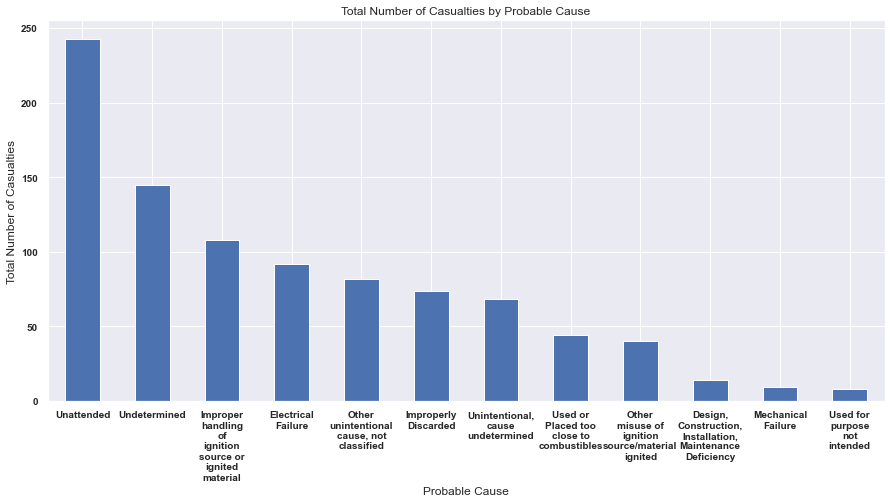

In [821]:
#probably cause that result in casualties 
df_temp=df[df['Civilian_Casualties']>0].copy()
result = df_temp.groupby('Possible_Cause')['Civilian_Casualties'].count()
result = result.sort_values(ascending=False)
result = result.head(12)
result.rename(index={'Design/Construction/Installation/Maintenance Deficiency':'Design, Construction, Installation, Maintenance Deficiency'},inplace=True)
plt.subplots(1, figsize=(15,7))
ax = result.plot(kind='bar')
plt.title('Total Number of Casualties by Probable Cause')
plt.xlabel('Probable Cause')
plt.ylabel('Total Number of Casualties')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
wrap_labels(ax, 10)

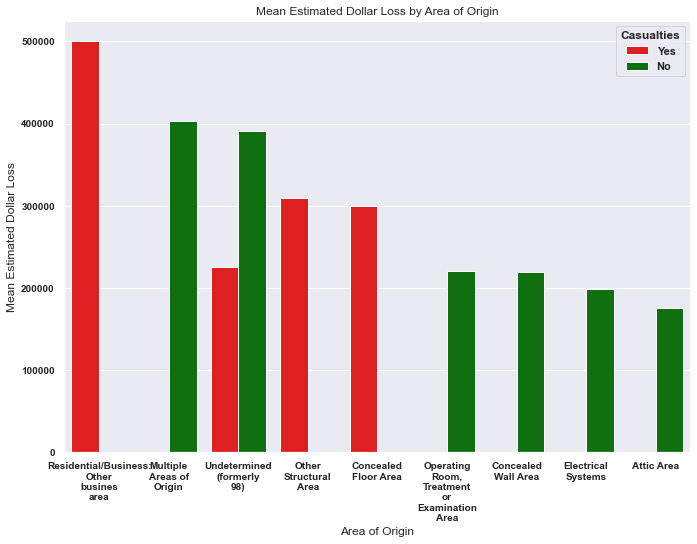

In [822]:
#total estimated dollar loss for each type of fire (area of origin)
df_mean = df.groupby(['Area_of_Origin', 'Casualties_YN'])['Estimated_Dollar_Loss'].mean().reset_index()
df_avg_money_loss = df_mean.sort_values(by='Estimated_Dollar_Loss', ascending=False)
df_avg_money_loss = df_avg_money_loss[df_avg_money_loss['Area_of_Origin']!="Under Investigation"].head(10)
colors = ['red', 'green']
plt.subplots(1, figsize=(10,7))
ax3 = sns.barplot(x='Area_of_Origin', y='Estimated_Dollar_Loss', hue='Casualties_YN', data=df_avg_money_loss, palette=colors)
plt.title('Mean Estimated Dollar Loss by Area of Origin')
plt.xlabel('Area of Origin')
plt.ylabel('Mean Estimated Dollar Loss')
plt.legend(title='Casualties')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
wrap_labels(ax3, 10)
plt.show()

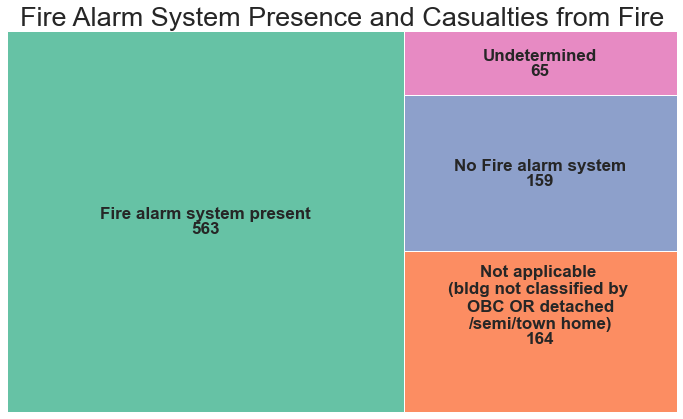

In [823]:
#cat plot yes/no casualties and smoke alarm 
df_temp=df[df['Civilian_Casualties']>0].copy()
result = df_temp.groupby('Fire_Alarm_System_Presence')['Civilian_Casualties'].count()
result = result.sort_values(ascending=False)
result = result.head(12)
result.rename(index={'Not applicable (bldg not classified by OBC OR detached/semi/town home)':'Not applicable \n(bldg not classified by \nOBC OR detached\n/semi/town home)'},inplace=True)
result = pd.DataFrame(result).reset_index()
result.columns =['Fire_Alarm_System_Presence', 'Civilian_Casualties']
plt.figure(figsize=(12,7))
squarify.plot(sizes=result['Civilian_Casualties'], label=result['Fire_Alarm_System_Presence'], value=result['Civilian_Casualties'],
              color=[matplotlib.cm.Set2(i) for i in range(7)],
              text_kwargs={'fontsize': 17})
plt.title('Fire Alarm System Presence and Casualties from Fire', fontsize=27)
plt.axis('off')
plt.show()

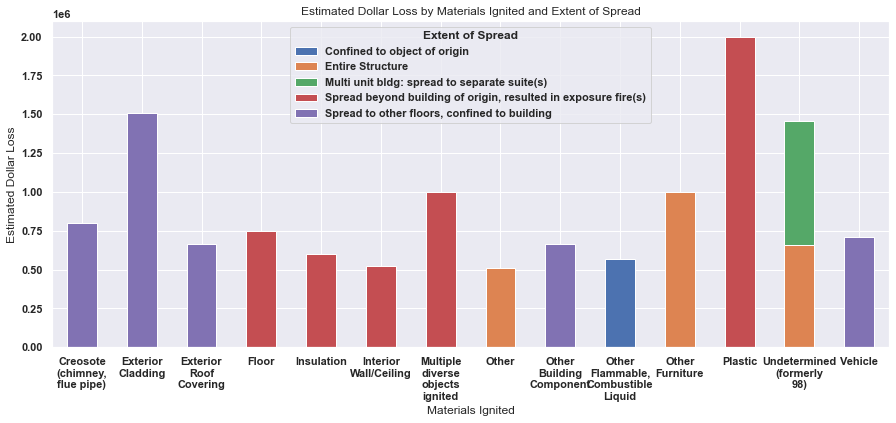

In [824]:
#estimated dollar loss by materials ignited and extend of spread 
df_sum = df.groupby(['Material_First_Ignited', 'Extent_Of_Fire'])['Estimated_Dollar_Loss'].mean().reset_index()
df_sum = df_sum.sort_values(by='Estimated_Dollar_Loss', ascending=False)
df_sum = df_sum[df_sum['Material_First_Ignited']!="Under Investigation"]
df_sum_top15 = df_sum.head(15)
df_pivot = df_sum_top15.pivot(index='Material_First_Ignited', columns='Extent_Of_Fire', values='Estimated_Dollar_Loss')
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(15, 6))
ax.set_xlabel('Materials Ignited')
ax.set_ylabel('Estimated Dollar Loss')
ax.set_title('Estimated Dollar Loss by Materials Ignited and Extent of Spread')
plt.legend(title='Extent of Spread')
wrap_labels(ax, 10)
plt.show()

In [825]:
#extent of fire and material first ignited for each extent type 
df_count = df.groupby(['Extent_Of_Fire', 'Material_First_Ignited']).size()
df_count = pd.DataFrame(df_count).reset_index()
df_count = df_count[df_count['Material_First_Ignited'] != 'Undetermined (formerly 98)']
df_count.rename(columns={0: 'Count'}, inplace=True)

#parent
extent_of_fire = df_count.groupby('Extent_Of_Fire')['Count'].sum().reset_index()
extent_of_fire = extent_of_fire.sort_values(by=['Count'], ascending=False).reset_index()
extent_of_fire = extent_of_fire[['Extent_Of_Fire', 'Count']]
extent_of_fire

sorted_df = pd.DataFrame()
for ind in extent_of_fire.index:
    
    extent_type = extent_of_fire['Extent_Of_Fire'][ind]
    fire_df = df_count[df_count['Extent_Of_Fire']==extent_type]
    
    material_first_ignited = fire_df.groupby('Material_First_Ignited')['Count'].sum().reset_index()
    material_first_ignited = material_first_ignited.sort_values(by=['Count'], ascending=False)
    
    for ind in material_first_ignited.index:
        temp = material_first_ignited['Material_First_Ignited'][ind]
        mat_df = df_count[df_count['Material_First_Ignited']==temp].sort_values(by=['Count'], ascending=False)
        sorted_df = pd.concat([sorted_df, mat_df], ignore_index=True)

sorted_df = sorted_df[sorted_df['Count']>15]

colors = ['rgb(254,235,226)', 'rgb(252,197,192)', 'rgb(250,159,181)', 'rgb(247,104,161)', 'rgb(197,27,138)']

fig = px.treemap(sorted_df, 
                 path=['Extent_Of_Fire', 'Material_First_Ignited'], 
                 values='Count', color_continuous_scale=colors)


fig.update_traces(textinfo='label+value')
fig.update_layout(width=1000, height=800)

fig.show()

/Users/user/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/user/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [826]:
df_count = df.groupby(['Extent_Of_Fire', 'Material_First_Ignited']).size()
df_count = pd.DataFrame(df_count).reset_index()
df_count = df_count[df_count['Material_First_Ignited'] != 'Undetermined (formerly 98)']
df_count = df_count[df_count['Material_First_Ignited'] != 'Undetermined']
df_count = df_count[df_count['Extent_Of_Fire'] != 'Confined to object of origin']
df_count = df_count[df_count['Extent_Of_Fire'] != 'Confined to part of room/area of origin']
df_count = df_count[df_count['Extent_Of_Fire'] != 'Confined to roof/exterior structure']
df_count.rename(columns={0: 'Count'}, inplace=True)

#parent
extent_of_fire = df_count.groupby('Extent_Of_Fire')['Count'].sum().reset_index()
extent_of_fire = extent_of_fire.sort_values(by=['Count'], ascending=False).reset_index()
extent_of_fire = extent_of_fire[['Extent_Of_Fire', 'Count']]
extent_of_fire

sorted_df = pd.DataFrame()
for ind in extent_of_fire.index:
    
    extent_type = extent_of_fire['Extent_Of_Fire'][ind]
    fire_df = df_count[df_count['Extent_Of_Fire']==extent_type]
    
    material_first_ignited = fire_df.groupby('Material_First_Ignited')['Count'].sum().reset_index()
    material_first_ignited = material_first_ignited.sort_values(by=['Count'], ascending=False)
    
    for ind in material_first_ignited.index:
        temp = material_first_ignited['Material_First_Ignited'][ind]
        mat_df = df_count[df_count['Material_First_Ignited']==temp].sort_values(by=['Count'], ascending=False)
        sorted_df = pd.concat([sorted_df, mat_df], ignore_index=True)

sorted_df = sorted_df[sorted_df['Count']>5]

colors = ['rgb(254,235,226)', 'rgb(252,197,192)', 'rgb(250,159,181)', 'rgb(247,104,161)', 'rgb(197,27,138)']

fig = px.treemap(sorted_df, 
                 path=['Extent_Of_Fire', 'Material_First_Ignited'], 
                 values='Count', color_continuous_scale=colors)


fig.update_traces(textinfo='label+value')
fig.update_layout(width=1000, height=800)

fig.show()

/Users/user/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/user/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [827]:
#which areas receive the most fire emergency calls 
!pip install geopandas
!pip install matplotlib
!pip install contextily
!pip install folium

/Users/user/opt/anaconda3/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning:

The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 20).



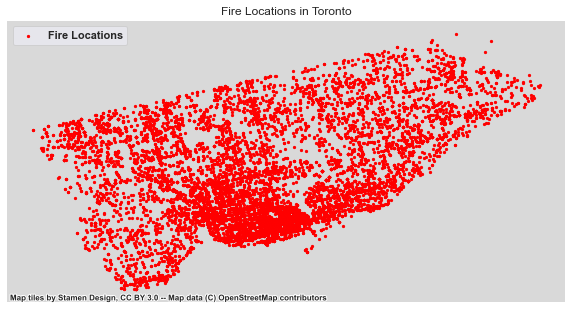

In [828]:
#all the areas where fire incident occured
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))
toronto_map = ctx.providers.Stamen.TonerLite
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, markersize=5, color='red', label='Fire Locations')
ax.set_title('Fire Locations in Toronto')
ax.set_axis_off()
ctx.add_basemap(ax, crs=gdf.crs, source=toronto_map)
plt.legend()
plt.show()

In [829]:
#mapping the incident to a particular toronto borough according to it's lon and lat value 
def get_borough(lat, lon):
    # Define the coordinates for each borough
    etobicoke = {'nw_lat': 43.7236, 'nw_lon': -79.6056, 'ne_lat': 43.7236, 'ne_lon': -79.4949, 'se_lat': 43.5903, 'se_lon': -79.4949, 'sw_lat': 43.5903, 'sw_lon': -79.6056}
    north_york = {'nw_lat': 43.8258, 'nw_lon': -79.5541, 'ne_lat': 43.8258, 'ne_lon': -79.3330, 'se_lat': 43.6684, 'se_lon': -79.3330, 'sw_lat': 43.6684, 'sw_lon': -79.5541}
    scarborough = {'nw_lat': 43.9393, 'nw_lon': -79.3396, 'ne_lat': 43.9393, 'ne_lon': -79.1120, 'se_lat': 43.6714, 'se_lon': -79.1120, 'sw_lat': 43.6714, 'sw_lon': -79.3396}
    york = {'nw_lat': 43.7616, 'nw_lon': -79.5219, 'ne_lat': 43.7616, 'ne_lon': -79.4303, 'se_lat': 43.6833, 'se_lon': -79.4303, 'sw_lat': 43.6833, 'sw_lon': -79.5219}
    east_york = {'nw_lat': 43.7218, 'nw_lon': -79.3570, 'ne_lat': 43.7218, 'ne_lon': -79.3018, 'se_lat': 43.6903, 'se_lon': -79.3018, 'sw_lat': 43.6903, 'sw_lon': -79.3570}
    old_toronto = {'nw_lat': 43.7296, 'nw_lon': -79.4312, 'ne_lat': 43.7296, 'ne_lon': -79.3639, 'se_lat': 43.6413, 'se_lon': -79.3639, 'sw_lat': 43.6413, 'sw_lon': -79.4312}
    
    # Check if the coordinates fall within each borough
    if (etobicoke['nw_lat'] >= lat >= etobicoke['sw_lat']) and (etobicoke['nw_lon'] <= lon <= etobicoke['ne_lon']):
        return 'Etobicoke'
    elif (north_york['nw_lat'] >= lat >= north_york['sw_lat']) and (north_york['nw_lon'] <= lon <= north_york['ne_lon']):
        return 'North York'
    elif (scarborough['nw_lat'] >= lat >= scarborough['sw_lat']) and (scarborough['nw_lon'] <= lon <= scarborough['ne_lon']):
        return 'Scarborough'
    elif (york['nw_lat'] >= lat >= york['sw_lat']) and (york['nw_lon'] <= lon <= york['ne_lon']):
        return 'York'
    elif (old_toronto['nw_lat'] >= lat >= old_toronto['sw_lat']) and (old_toronto['nw_lon'] <= lon <= old_toronto['ne_lon']):
        return 'Old Toronto'
    else: 
        return "East York"
    
df["Borough"] = "Unknown"

for i, row in df.iterrows(): 
    
    long = row["Longitude"]
    lat = row["Latitude"]
    b = get_borough(lat, long)
    df.at[i,'Borough'] = b

df.head()
    

Area_of_Origin  \
0                                   Porch or Balcony   
1                            Cooking Area or Kitchen   
2     Living Area (e.g. living, TV, recreation, etc)   
3                        Undetermined  (formerly 98)   
4  Sleeping Area or Bedroom (inc. patients room, ...   

                   Business_Impact  Civilian_Casualties  \
0         No business interruption                    0   
1                     Undetermined                    0   
2  Not applicable (not a business)                    1   
3        May not resume operations                    0   
4  Not applicable (not a business)                    8   

   Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
0                        86                   3000   
1                        28                  50000   
2                        16                1000000   
3                        12                1000000   
4                        11                 125000   

   Estimated_Number_Of_Persons_Displaced Ext_agent_app_or_defer_time  \
0                                      0         2018-08-24 17:06:26   
1                                     28         2018-11-24 07:19:00   
2                                    130         2017-02-09 18:02:13   
3                                     14         2012-10-30 00:52:04   
4                                      2         2018-07-08 04:35:00   

                             Extent_Of_Fire  \
0              Confined to object of origin   
1   Confined to part of room/area of origin   
2  Spread beyond room of origin, same floor   
3                          Entire Structure   
4  Spread beyond room of origin, same floor   

              Fire_Alarm_System_Impact_on_Evacuation  \
0  Not applicable: Occupant(s) first alerted by o...   
1  Not applicable: Occupant(s) first alerted by o...   
2  Some persons (at risk) evacuated as a result o...   
3                                       Undetermined   
4  Some persons (at risk) evacuated as a result o...   

                Fire_Alarm_System_Operation Fire_Alarm_System_Presence  \
0         Fire alarm system did not operate  Fire alarm system present   
1                Fire alarm system operated  Fire alarm system present   
2                Fire alarm system operated  Fire alarm system present   
3  Fire alarm system operation undetermined               Undetermined   
4                Fire alarm system operated  Fire alarm system present   

  Fire_Under_Control_Time                                    Ignition_Source  \
0     2018-08-24 17:06:28                                       Undetermined   
1     2018-11-24 07:19:00  Other Cooking Items (eg Toaster, Kettle, elec ...   
2     2017-02-09 18:36:21                                       Undetermined   
3     2012-10-30 01:28:48                                       Undetermined   
4     2018-07-08 04:38:28        Matches or Lighters (unable to distinguish)   

   Incident_Station_Area  Incident_Ward Last_TFS_Unit_Clear_Time   Latitude  \
0                    114           18.0      2018-08-24 17:42:43  43.760357   
1                    142            7.0      2018-11-24 12:45:21  43.754542   
2                    325           27.0      2017-02-09 23:36:33  43.657300   
3                    332           20.0      2012-11-01 16:30:31  43.649350   
4                    442            5.0      2018-07-08 16:44:07  43.697960   

   Longitude      Material_First_Ignited           Method_Of_Fire_Control  \
0 -79.412479  Undetermined (formerly 98)  Extinguished by fire department   
1 -79.530419                     Plastic         Extinguished by occupant   
2 -79.373460  Undetermined (formerly 98)  Extinguished by fire department   
3 -79.393700  Undetermined (formerly 98)  Extinguished by fire department   
4 -79.511539                     Bedding  Extinguished by fire department   

        Possible_Cause                         Property_Use  \
0         Undetermined  Multi-Unit Dwelli

In [830]:
df['Year'] = df['TFS_Alarm_Time'].dt.year
df_2012 = df[df['Year'] == 2012].copy()

In [831]:
#total fire incidents for each borough in 2012 
df_2012 = df[df['Year'] == 2012].copy()
df_borough = df_2012.groupby('Borough').size().reset_index(name='FireCount')
print(df_borough)
coordinates = {'Etobicoke': {'Latitude': 43.6205, 'Longitude': -79.5132},
               'North York': {'Latitude': 43.7615, 'Longitude': -79.4111},
               'Scarborough': {'Latitude': 43.7731, 'Longitude': -79.2578},
               'York': {'Latitude': 43.6895, 'Longitude': -79.4700},
               'East York': {'Latitude': 43.6912, 'Longitude': -79.3417},
               'Old Toronto': {'Latitude': 43.6519, 'Longitude': -79.3817}}

Latitude = [43.6912, 43.6205, 43.7615, 43.6519, 43.7731 ]
Longitude = [-79.3417, -79.5132, -79.4111, -79.3817, -79.2578]
df_borough['Latitude'] = Latitude
df_borough['Longitude'] = Longitude

print(df_borough)

toronto_map = folium.Map(location=[43.70, -79.42], zoom_start=11)

for index, row in df_borough.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['FireCount'] / 6,  
        popup=f"Borough: {row['Borough']}<br>FireCount: {row['FireCount']}",
        fill=True,
        fill_opacity=0.7,
        color='red',
        fill_color='red',
    ).add_to(toronto_map)

toronto_map

       Borough  FireCount
0    East York        222
1    Etobicoke        142
2   North York        472
3  Old Toronto        188
4  Scarborough        330
       Borough  FireCount  Latitude  Longitude
0    East York        222   43.6912   -79.3417
1    Etobicoke        142   43.6205   -79.5132
2   North York        472   43.7615   -79.4111
3  Old Toronto        188   43.6519   -79.3817
4  Scarborough        330   43.7731   -79.2578


In [832]:
#total fire incidents for each borough in 2011
df_2012 = df[df['Year'] == 2011].copy()
df_borough = df_2012.groupby('Borough').size().reset_index(name='FireCount')

coordinates = {'Etobicoke': {'Latitude': 43.6205, 'Longitude': -79.5132},
               'North York': {'Latitude': 43.7615, 'Longitude': -79.4111},
               'Scarborough': {'Latitude': 43.7731, 'Longitude': -79.2578},
               'York': {'Latitude': 43.6895, 'Longitude': -79.4700},
               'East York': {'Latitude': 43.6912, 'Longitude': -79.3417},
               'Old Toronto': {'Latitude': 43.6519, 'Longitude': -79.3817}}

Latitude = [43.6912, 43.6205, 43.7615, 43.6519, 43.7731 ]
Longitude = [-79.3417, -79.5132, -79.4111, -79.3817, -79.2578]
df_borough['Latitude'] = Latitude
df_borough['Longitude'] = Longitude

print(df_borough)

toronto_map = folium.Map(location=[43.70, -79.42], zoom_start=11)

for index, row in df_borough.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['FireCount'] / 6, 
        popup=f"Borough: {row['Borough']}<br>FireCount: {row['FireCount']}",
        fill=True,
        fill_opacity=0.7,
        color='red',
        fill_color='red',
    ).add_to(toronto_map)

toronto_map

       Borough  FireCount  Latitude  Longitude
0    East York        183   43.6912   -79.3417
1    Etobicoke        179   43.6205   -79.5132
2   North York        473   43.7615   -79.4111
3  Old Toronto        182   43.6519   -79.3817
4  Scarborough        300   43.7731   -79.2578


In [833]:
#seperating data for each year
coordinates = {'Etobicoke': {'Latitude': 43.6205, 'Longitude': -79.5132},
               'North York': {'Latitude': 43.7615, 'Longitude': -79.4111},
               'Scarborough': {'Latitude': 43.7731, 'Longitude': -79.2578},
               'York': {'Latitude': 43.6895, 'Longitude': -79.4700},
               'East York': {'Latitude': 43.6912, 'Longitude': -79.3417},
               'Old Toronto': {'Latitude': 43.6519, 'Longitude': -79.3817}}
Latitude = [43.6912, 43.6205, 43.7615, 43.6519, 43.7731 ]
Longitude = [-79.3417, -79.5132, -79.4111, -79.3817, -79.2578]

df_2011 = df[df['Year'] == 2011].copy()
df_2012 = df[df['Year'] == 2012].copy()
df_2013 = df[df['Year'] == 2013].copy()
df_2014 = df[df['Year'] == 2014].copy()
df_2015 = df[df['Year'] == 2015].copy()
df_2016 = df[df['Year'] == 2016].copy()
df_2017 = df[df['Year'] == 2017].copy()
df_2018 = df[df['Year'] == 2018].copy()

df_borough11 = df_2011.groupby('Borough').size().reset_index(name='FireCount')

df_borough11['Latitude'] = Latitude
df_borough11['Longitude'] = Longitude
df_borough11["Year"] = 2011

df_borough12 = df_2012.groupby('Borough').size().reset_index(name='FireCount')

df_borough12['Latitude'] = Latitude
df_borough12['Longitude'] = Longitude
df_borough12["Year"] = 2012

df_borough13 = df_2013.groupby('Borough').size().reset_index(name='FireCount')

df_borough13['Latitude'] = Latitude
df_borough13['Longitude'] = Longitude
df_borough13["Year"] = 2013

df_borough14 = df_2014.groupby('Borough').size().reset_index(name='FireCount')

df_borough14['Latitude'] = Latitude
df_borough14['Longitude'] = Longitude
df_borough14["Year"] = 2014

df_borough15 = df_2015.groupby('Borough').size().reset_index(name='FireCount')

df_borough15['Latitude'] = Latitude
df_borough15['Longitude'] = Longitude
df_borough15["Year"] = 2015

df_borough16 = df_2016.groupby('Borough').size().reset_index(name='FireCount')

df_borough16['Latitude'] = Latitude
df_borough16['Longitude'] = Longitude
df_borough16["Year"] = 2016

df_borough17 = df_2017.groupby('Borough').size().reset_index(name='FireCount')

df_borough17['Latitude'] = Latitude
df_borough17['Longitude'] = Longitude
df_borough17["Year"] = 2017

df_borough18 = df_2018.groupby('Borough').size().reset_index(name='FireCount')

df_borough18['Latitude'] = Latitude
df_borough18['Longitude'] = Longitude
df_borough18["Year"] = 2018

merged_df = pd.concat([df_borough11, df_borough12, df_borough13, df_borough14, df_borough15, df_borough16, df_borough17, df_borough18], axis=0)

merged_df



Borough  FireCount  Latitude  Longitude  Year
0    East York        183   43.6912   -79.3417  2011
1    Etobicoke        179   43.6205   -79.5132  2011
2   North York        473   43.7615   -79.4111  2011
3  Old Toronto        182   43.6519   -79.3817  2011
4  Scarborough        300   43.7731   -79.2578  2011
0    East York        222   43.6912   -79.3417  2012
1    Etobicoke        142   43.6205   -79.5132  2012
2   North York        472   43.7615   -79.4111  2012
3  Old Toronto        188   43.6519   -79.3817  2012
4  Scarborough        330   43.7731   -79.2578  2012
0    East York        203   43.6912   -79.3417  2013
1    Etobicoke        162   43.6205   -79.5132  2013
2   North York        463   43.7615   -79.4111  2013
3  Old Toronto        176   43.6519   -79.3817  2013
4  Scarborough        328   43.7731   -79.2578  2013
0    East York        206   43.6912   -79.3417  2014
1    Etobicoke        164   43.6205   -79.5132  2014
2   North York        513   43.7615   -79.4111  2014
3  Old Toronto        185   43.6519   -79.3817  2014
4  Scarborough        299   43.7731   -79.2578  2014
0    East York        197   43.6912   -79.3417  2015
1    Etobicoke        158   43.6205   -79.5132  2015
2   North York        437   43.7615   -79.4111  2015
3  Old Toronto        165   43.6519   -79.3817  2015
4  Scarborough        297   43.7731   -79.2578  2015
0    East York        214   43.6912   -79.3417  2016
1    Etobicoke        163   43.6205   -79.5132  2016
2   North York        422   43.7615   -79.4111  2016
3  Old Toronto        196   43.6519   -79.3817  2016
4  Scarborough        323   43.7731   -79.2578  2016
0    East York        209   43.6912   -79.3417  2017
1    Etobicoke        167   43.6205   -79.5132  2017
2   North York        423   43.7615   -79.4111  2017
3  Old Toronto        190   43.6519   -79.3817  2017
4  Scarborough        272   43.7731   -79.2578  2017
0    East York        208   43.6912   -79.3417  2018
1    Etobicoke        143   43.6205   -79.5132  2018
2   North York        473   43.7615   -79.4111  2018
3  Old Toronto        202   43.6519   -79.3817  2018
4  Scarborough        311   43.7731   -79.2578  2018

In [834]:
#stacked bubblemap for total number of incidents per borough for each year 
toronto_map = folium.Map(location=[43.70, -79.42], zoom_start=11)
years_list = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
colors = ["red", "green", "blue", "yellow", "orange", "purple", "pink", "brown"]
offset = 0.005  

years_list = sorted(years_list)

firecount_dict = {}
for i, year in enumerate(years_list):
    year_df = merged_df[merged_df['Year'] == year]
    offset_lat = offset * (i+1)
    offset_lon = offset * (i+1)
    firecount_dict[year] = year_df['FireCount'].tolist()

    for index, row in year_df.iterrows():
        lat = row['Latitude'] + offset_lat
        lon = row['Longitude'] + offset_lon
        
        firecount = firecount_dict[year][index]
        
        folium.CircleMarker(
            location=[lat, lon],  
            radius=firecount / 7,  
            popup=f"Borough: {row['Borough']}<br>FireCount: {firecount}<br>Year: {year}",
            fill=True,
            fill_opacity=0.7,
            color=colors[i],  
            fill_color=colors[i],
        ).add_to(toronto_map)


toronto_map


In [835]:
#total incidents per smaller regions 
latitude = 43.70
longitude = -79.42
m = folium.Map(location=[latitude, longitude], zoom_start=11)

filtered_data = df.copy()
marker_cluster = MarkerCluster()

grouped_data = filtered_data.groupby(['Latitude', 'Longitude']).size().reset_index(name='Count')

for index, row in grouped_data.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    
    radius = row['Count'] / 10  
    circle_marker = folium.CircleMarker(location=[lat, lon], radius=radius, fill=True, fill_opacity=0.7,
                                       color='red', fill_color='red')
    
    circle_marker.add_to(marker_cluster)

marker_cluster.add_to(m)

m
